In [6]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
N = 2
M = 5
V = -1
dt = 0.01

time_options = np.arange(0.1,2.5,0.1)
final_J_V_ratios = np.arange(0.1,2.0,0.1)

time_options_grid, final_J_V_ratios_grid = np.meshgrid(time_options, final_J_V_ratios)
probability_grid = np.zeros_like(time_options_grid)

for idx1, time_option in enumerate(time_options):
    time_array = [time_option, time_option, time_option, time_option]
    
    for idx2, final_J_V_ratio in enumerate(final_J_V_ratios):

        J_V_ratios = [
            [0.1, 10],  # step 1
            [10, 10],   # step 2
            [10, 2],    # step 3
            [2, final_J_V_ratio]    # step 4
        ]

        mu_V_ratios = [
            [10, 10],  # step 1
            [10, 0],   # step 2
            [0, 0],    # step 3
            [0, 0]     # step 4
        ]

        times, J_V_ratio_routine, mu_V_ratio_routine = make_linear_stepped_routines(J_V_ratios, mu_V_ratios, time_array, dt)

        adiabatic_energies, adiabatic_wavefunctions, adiabatic_probabilities, adiabatic_overlaps, true_energies = \
            simulate_adiabatic_evolution(N, M, V, mu_V_ratio_routine, J_V_ratio_routine, times, dt=dt, initial_state=None)
            
        probability_grid[idx1,idx2] = adiabatic_probabilities[-1, 0]

0.015649418724153614
0.02054835162392228
0.024036946176037976
0.026568812345311683
0.02846159573589521
0.0299171160098207
0.0310648583985526
0.031989851524792154
0.032749441956334883
0.03338335272675743
0.033919799623201706
0.0343792910623903
0.0347770464400628
0.03512457306126478
0.035430718640354665
0.03570238927237709
0.03594504919144143
0.03616307515833324
0.036360012082606585
0.14507978471346916
0.15756463525447337
0.15665931689174484
0.15278196729286989
0.1487497740710505
0.14519341871184704
0.14218261543584565
0.13965310958754074
0.13752042686440902
0.13570886771470556
0.13415679310735987
0.13281551547223483
0.13164686008924317
0.13062083024272866
0.1297137049479691
0.12890657250980792
0.12818422250755218
0.12753431288367165
0.12694674261091413
0.13566924984948683
0.17475565529740758
0.2000484661824893
0.21721113593930938
0.22947661535912253
0.23861702604019386
0.24566074245634664
0.2512383163426101
0.25575480321557753
0.2594808391070692
0.2626034076469691
0.26525546858950494
0.

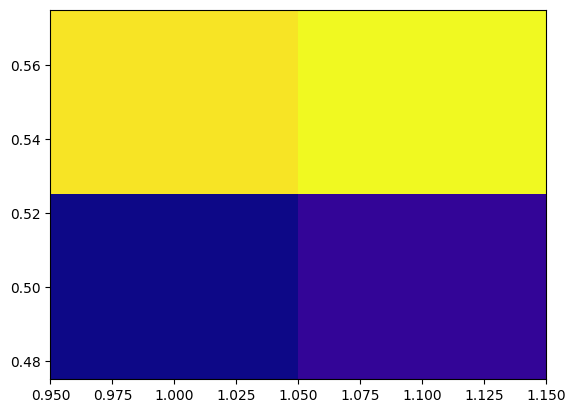

In [ ]:
plt.pcolormesh(time_options_grid, final_J_V_ratios_grid, probability_grid, shading = "auto", cmap = "plasma", vmin = 0, vmax = 1)
plt.colorbar(label="Ground State Probability")
plt.xlabel("$T$")
plt.ylabel("$J/|V|$")
plt.title("Lower Bound Probability Grid")